# Weather Analysis Across Latitudes 

### Conclusions

#### 1) As shown in the "Tempurature Across Latitudes" graph, the expected trend of increasing tempurature while approaching the Equator (Latitiude = 0) is generally confirmed.  This trend is due to the the sphere-like shape of the earth, energy from the sun that hits latitudes with their absolute value greater than 23.5 is never intersecting earths atmosphere perpendicularly. Therefore, in latitudes greater than 23.5 more energy from the sun is reflected off the atmosphere and the energy that makes it trough has to pass through longer distances in shielding layers of the atmosphere, thus reducing the total amount of energy from the sun that makes it to the lower level atmosphere where our measurements are collected.  

#### 2) When looking at the "Humidity Across Laditudes" graph, there is a noticable concentration of high humidtity readings for cities that are in the northern hemisphere with latitudes between 40-70.  Given the date of this analysis (October 2019), this trend would make sense.  Now, after late september when the sun crosses the equator while heading south, the northern hemisphere is moving into it's shorter days and lower sun intensity exposure.  This alllows for more rainy days, and therefore allows for more humid days. To add to this trend, there are generally more cities with 100% Cloud Cover within the positive latitdues (northern hemisphere).

#### 3) Generally speaking, wind speeds across the globe are usually below 10 miles per hour today (10/27/2019).  Interestingly, this generalization becomes increasingly less of an accurate description the further you move away from the equator.  It seems like there are significantly more wind speed measurements that are greater than 10 MPH when the city is north of latitude 20 or south of latitude -20. 

#### 4) Just a general note about the data collection, we randomly generated numbers between -90 and 90 for the latitudes, and as seen in the histograms a few cells down, there was a fairly even distribution of selected latitudes across all of the potential values.  However, when looking at all the graphs that are generated from data retrieved from API calls through openweathermapy, there are significantly more data points in the northern hemisphere of the globe.  This is likely due to the reach that the website collecting all the weather data has.  There either are less locations that are tracking weather data in a way that the website can access in the southern hemisphere of the globe, or there are simply less cities that are large enough to be within the openweathermap in the southern hemisphere of the globe.  Again, when looking at the distribution of the latitudes generated for this exersize, the lack of data in the southern hemispere is due to the weather API not having records for the city names given to us from "citipy" based off the generated coordinates. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
from citipy import citipy
from config import api_key
import openweathermapy as ow




In [3]:
city = citipy.nearest_city(23.5,56).city_name
print(city)

nizwa


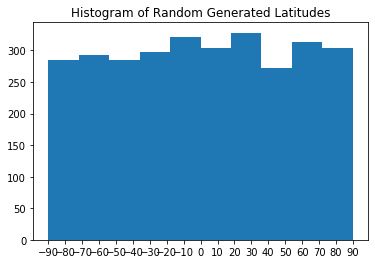

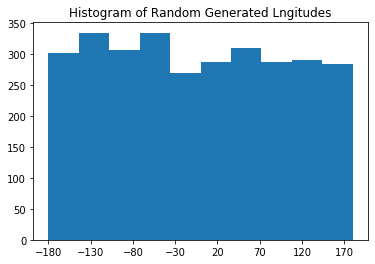

991


In [11]:
import seaborn as sns

lats = np.random.uniform(low=-90.000, high=90.000, size=3000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=3000)


plt.hist(lats)
plt.xticks(np.arange(-90,91,10))
plt.title('Histogram of Random Generated Latitudes')
plt.show()

plt.hist(lngs)
plt.xticks(np.arange(-180,180,50))
plt.title('Histogram of Random Generated Lngitudes')
plt.show()

cities = []
for lat, lng in zip(lats, lngs):
    city = citipy.nearest_city(lat,lng).city_name
    if city not in cities:
        cities.append(city)

print(len(cities))

In [8]:
sum_df = pd.DataFrame({
    'City':cities
})

sum_df.head()

,City
0,castro
1,port hedland
2,asau
3,sao filipe
4,hokitika


In [9]:
settings = {
    'units':'imperial',
    'appid':api_key
}

print("Beginning Data Retrieval\n")
print("------------------------\n")

for i in range(len(cities)):
    print('Processing Record {} of {} | City: {}'.format(i+1,len(cities),cities[i]))
    try:
        responce = ow.get_current(cities[i],**settings)
        sum_df.loc[sum_df['City']==cities[i],'Country'] = responce('sys.country')
        sum_df.loc[sum_df['City']==cities[i],'Date'] = responce('dt')
        sum_df.loc[sum_df['City']==cities[i],'Lat'] = responce('coord.lat')
        sum_df.loc[sum_df['City']==cities[i],'Lng'] = responce('coord.lon')
        sum_df.loc[sum_df['City']==cities[i],'Max Temp'] = responce('main.temp_max')
        sum_df.loc[sum_df['City']==cities[i],'Wind Speed'] = responce('wind.speed')
        sum_df.loc[sum_df['City']==cities[i],'Humidity'] = responce('main.humidity')
        sum_df.loc[sum_df['City']==cities[i],'Cloudiness'] = responce('clouds.all')
        sum_df.loc[sum_df['City']==cities[i],'Timezone'] = responce('timezone')
    except:
        print("City not Found. Skipping..")

  

Beginning Data Retrieval

------------------------

City not Found. Skipping..
City not Found. Skipping..
City not Found. Skipping..
City not Found. Skipping..
City not Found. Skipping..
City not Found. Skipping..
City not Found. Skipping..
City not Found. Skipping..
City not Found. Skipping..
City not Found. Skipping..
City not Found. Skipping..
City not Found. Skipping..
City not Found. Skipping..
City not Found. Skipping..
City not Found. Skipping..
City not Found. Skipping..
City not Found. Skipping..
City not Found. Skipping..
City not Found. Skipping..
City not Found. Skipping..
City not Found. Skipping..
City not Found. Skipping..
City not Found. Skipping..
City not Found. Skipping..
City not Found. Skipping..
City not Found. Skipping..
City not Found. Skipping..
City not Found. Skipping..
City not Found. Skipping..
City not Found. Skipping..
City not Found. Skipping..
City not Found. Skipping..
City not Found. Skipping..
City not Found. Skipping..
City not Found. Skipping..
Cit

In [10]:
sum_df = sum_df.dropna()
#sum_df['Date'] = pd.to_datetime(sum_df['Date'], utc=True)
sum_df.info()
sum_df.to_csv('WeatherCSV.csv')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 904 entries, 0 to 1009
Data columns (total 10 columns):
City          904 non-null object
Country       904 non-null object
Date          904 non-null float64
Lat           904 non-null float64
Lng           904 non-null float64
Max Temp      904 non-null float64
Wind Speed    904 non-null float64
Humidity      904 non-null float64
Cloudiness    904 non-null float64
Timezone      904 non-null float64
dtypes: float64(8), object(2)
memory usage: 77.7+ KB


# Temperature Across Latitudes

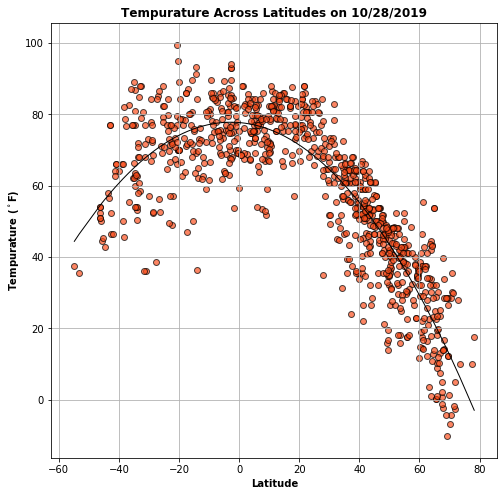

In [7]:
from datetime import datetime

now = datetime.now().strftime('%m/%d/%Y')

y = sum_df.loc[:,'Max Temp'].values
x = sum_df.loc[:,'Lat'].values

from scipy.optimize import curve_fit

def parab(x,a,b,h,k):
    return (a*((x-h)**2))+(b*(x-h)) + k

param, param_cov = curve_fit(parab,x,y)

#vertex = (-1*param[1])/(2*param[2])

x_ = np.unique(x)

plt.figure(figsize=(8,8))
plt.plot(x_,parab(x_,*param),label='Best Fit Line',color='k', linewidth=1)
#plt.scatter(vertex,parab(vertex,*param),color='r',s=500,edgecolor='k')
plt.scatter(x,y,edgecolor='k',alpha=.68,color='#fb4c19', label='Tempurature')
plt.xlabel('Latitude',fontweight='bold')
plt.ylabel('Tempurature ($^\circ$F)', fontweight='bold')
plt.title('Tempurature Across Latitudes on {}'.format(now),fontweight='bold')
plt.grid(True)
plt.savefig("Tempurature.png")
plt.show()

# Humidity Across Latitudes

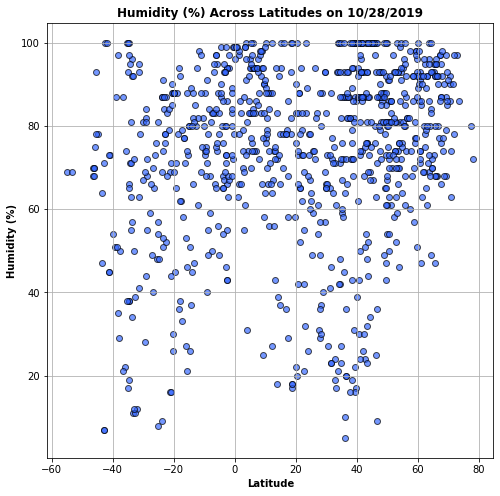

In [8]:
y = sum_df.loc[:,'Humidity'].values
x = sum_df.loc[:,'Lat'].values

plt.figure(figsize=(8,8))
plt.scatter(x,y,edgecolor='k',alpha=.68,color='#3366ff')
plt.xlabel('Latitude',fontweight='bold')
plt.ylabel('Humidity (%)', fontweight='bold')
plt.title('Humidity (%) Across Latitudes on {}'.format(now),fontweight='bold')
plt.grid(True)
plt.savefig("Humidity.png")
plt.show()

# Cloud Cover Across Latitudes

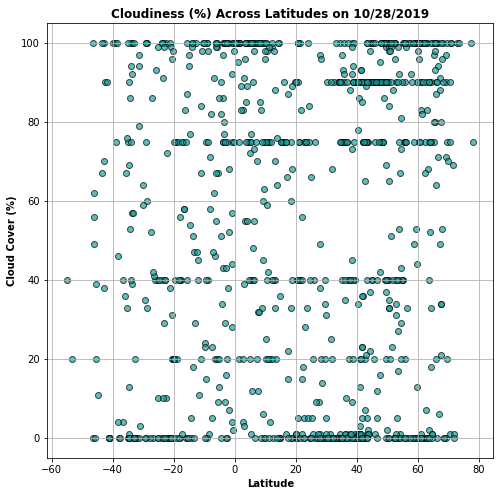

In [9]:
y = sum_df.loc[:,'Cloudiness'].values
x = sum_df.loc[:,'Lat'].values

plt.figure(figsize=(8,8))
plt.scatter(x,y,edgecolor='k',alpha=.68,color='#159f9b')
plt.xlabel('Latitude',fontweight='bold')
plt.ylabel('Cloud Cover (%)', fontweight='bold')
plt.title('Cloudiness (%) Across Latitudes on {}'.format(now),fontweight='bold')
plt.grid(True)
plt.savefig("Cloudiness.png")
plt.show()

# Wind Speed Across Latitudes

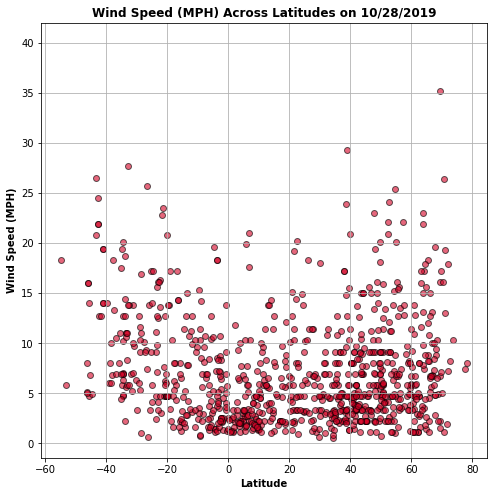

In [10]:
y = sum_df.loc[:,'Wind Speed'].values
x = sum_df.loc[:,'Lat'].values

plt.figure(figsize=(8,8))
plt.scatter(x,y,edgecolor='k',alpha=.6,color='#d40225')
plt.xlabel('Latitude',fontweight='bold')
plt.ylabel('Wind Speed (MPH)', fontweight='bold')
plt.title('Wind Speed (MPH) Across Latitudes on {}'.format(now),fontweight='bold')
plt.ylim(y.min()-2,42)

plt.grid(True)
plt.savefig("Wind.png")
plt.show()

# Extra Graphs/ Exploration from here onward


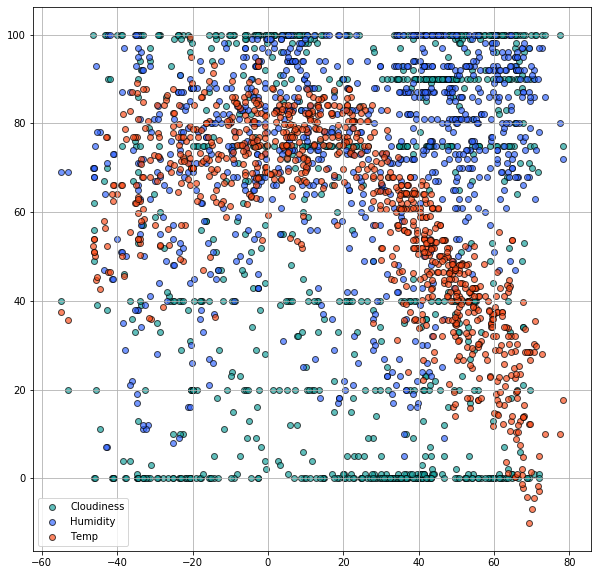

In [11]:

x = sum_df.loc[:,'Lat'].values


plt.figure(figsize=(10,10))
y_clouds = sum_df.loc[:,'Cloudiness'].values
plt.scatter(x,y_clouds,edgecolor='k',alpha=.68,color='#159f9b', label='Cloudiness')

y_hum = sum_df.loc[:,'Humidity'].values
plt.scatter(x,y_hum,edgecolor='k',alpha=.68,color='#3366ff',label='Humidity')

y = sum_df.loc[:,'Max Temp'].values
plt.scatter(x,y,edgecolor='k',alpha=.68,color='#fb4c19', label='Temp')

plt.grid(True)
plt.legend(loc='best')

plt.show()

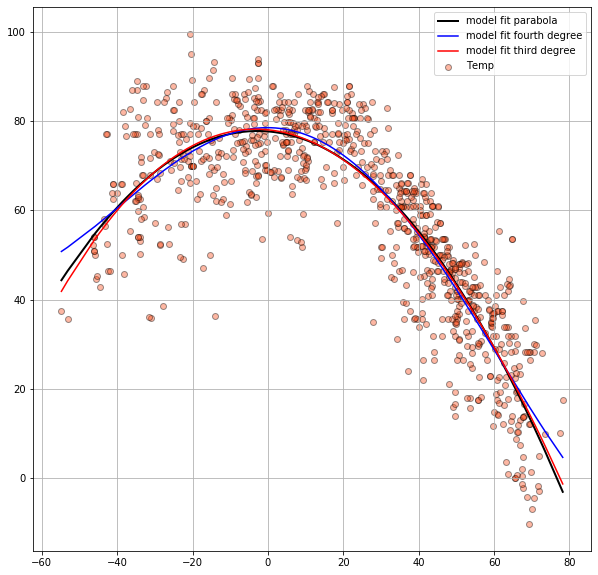

In [12]:
y = sum_df.loc[:,'Max Temp'].values
x = sum_df.loc[:,'Lat'].values

from scipy.optimize import curve_fit

def poly4(x,a,b,c,d,h,k):
    return (a*((x-h)**4))+(b*((x-h)**3))+(c*((x-h)**2))+(d*((x-h)))+ k

def poly3(x,a,b,d,h,k):
    return (a*((x-h)**3))+(b*((x-h)**2))+(d*((x-h)))+ k

def parab(x,a,b,h,k):
    return (a*((x-h)**2))+(b*(x-h)) + k

param4, param_cov4 = curve_fit(poly4,x,y,maxfev=10000)
param3, param_cov3 = curve_fit(poly3,x,y,maxfev=10000)
param1, param_cov1 = curve_fit(parab,x,y,maxfev=10000)

plt.figure(figsize=(10,10))
plt.plot(x_,parab(x_,*param1),label='model fit parabola',color='k', linewidth=2)
plt.plot(x_,poly4(x_,*param4),label='model fit fourth degree', color='b')
plt.plot(x_,poly3(x_,*param3),label='model fit third degree',color='r')
plt.scatter(x,y,edgecolor='k',alpha=.4,color='#fb4c19', label='Temp')
plt.grid(True)
plt.legend()

plt.show()


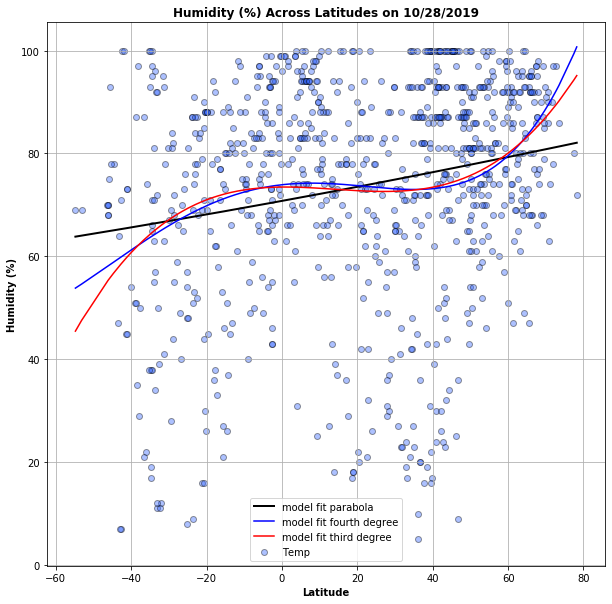

In [13]:
#Humidity Curves
y = sum_df.loc[:,'Humidity'].values
x = sum_df.loc[:,'Lat'].values

def poly4(x,a,b,c,d,h,k):
    return (a*((x-h)**4))+(b*((x-h)**3))+(c*((x-h)**2))+(d*((x-h)))+ k

def poly3(x,a,b,d,h,k):
    return (a*((x-h)**3))+(b*((x-h)**2))+(d*((x-h)))+ k

def parab(x,a,b,h,k):
    return (a*((x-h)**2))+(b*(x-h)) + k

param4, param_cov4 = curve_fit(poly4,x,y,maxfev=10000)
param3, param_cov3 = curve_fit(poly3,x,y,maxfev=10000)
param1, param_cov1 = curve_fit(parab,x,y,maxfev=10000)
x_= np.unique(x)
plt.figure(figsize=(10,10))
plt.plot(x_,parab(x_,*param1),label='model fit parabola',color='k', linewidth=2)
plt.plot(x_,poly4(x_,*param4),label='model fit fourth degree', color='b')
plt.plot(x_,poly3(x_,*param3),label='model fit third degree',color='r')
plt.scatter(x,y,edgecolor='k',alpha=.4,color='#3366ff', label='Temp')
plt.grid(True)
plt.legend()
plt.xlabel('Latitude',fontweight='bold')
plt.ylabel('Humidity (%)', fontweight='bold')
plt.title('Humidity (%) Across Latitudes on {}'.format(now),fontweight='bold')
plt.grid(True)

plt.show()


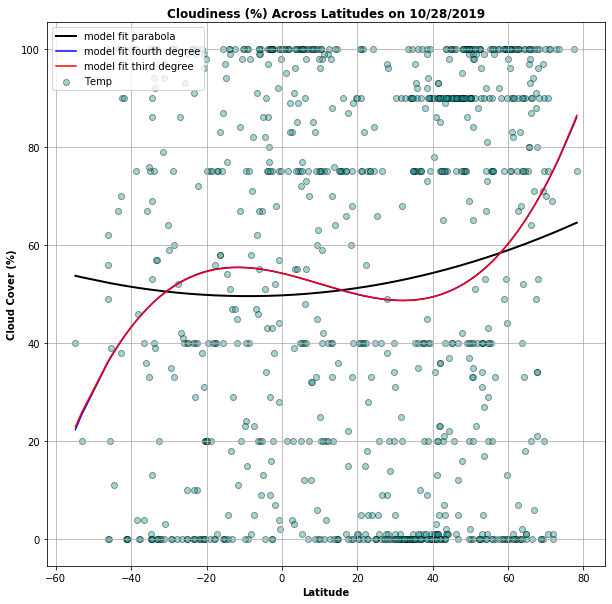

In [14]:
y = sum_df.loc[:,'Cloudiness'].values
x = sum_df.loc[:,'Lat'].values

def poly4(x,a,b,c,d,h,k):
    return (a*((x-h)**4))+(b*((x-h)**3))+(c*((x-h)**2))+(d*((x-h)))+ k

def poly3(x,a,b,d,h,k):
    return (a*((x-h)**3))+(b*((x-h)**2))+(d*((x-h)))+ k

def parab(x,a,b,h,k):
    return (a*((x-h)**2))+(b*(x-h)) + k

param4, param_cov4 = curve_fit(poly4,x,y,maxfev=10000)
param3, param_cov3 = curve_fit(poly3,x,y,maxfev=10000)
param1, param_cov1 = curve_fit(parab,x,y,maxfev=10000)
x_= np.unique(x)
plt.figure(figsize=(10,10))
plt.plot(x_,parab(x_,*param1),label='model fit parabola',color='k', linewidth=2)
plt.plot(x_,poly4(x_,*param4),label='model fit fourth degree', color='b')
plt.plot(x_,poly3(x_,*param3),label='model fit third degree',color='r')
plt.scatter(x,y,edgecolor='k',alpha=.4,color='#159f9b', label='Temp')
plt.grid(True)
plt.legend()
plt.xlabel('Latitude',fontweight='bold')
plt.xlabel('Latitude',fontweight='bold')
plt.ylabel('Cloud Cover (%)', fontweight='bold')
plt.title('Cloudiness (%) Across Latitudes on {}'.format(now),fontweight='bold')
plt.grid(True)

plt.show()

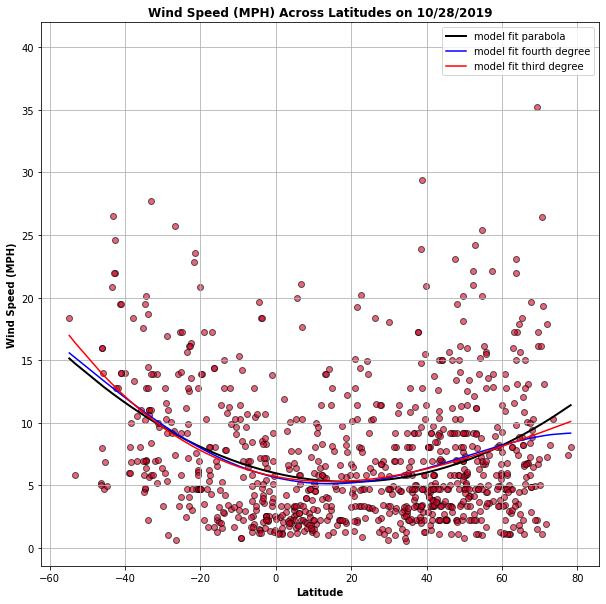

In [15]:
y = sum_df.loc[:,'Wind Speed'].values
x = sum_df.loc[:,'Lat'].values

def poly4(x,a,b,c,d,h,k):
    return (a*((x-h)**4))+(b*((x-h)**3))+(c*((x-h)**2))+(d*((x-h)))+ k

def poly3(x,a,b,d,h,k):
    return (a*((x-h)**3))+(b*((x-h)**2))+(d*((x-h)))+ k

def parab(x,a,b,h,k):
    return (a*((x-h)**2))+(b*(x-h)) + k

param4, param_cov4 = curve_fit(poly4,x,y,maxfev=10000)
param3, param_cov3 = curve_fit(poly3,x,y,maxfev=10000)
param1, param_cov1 = curve_fit(parab,x,y,maxfev=10000)
x_= np.unique(x)
plt.figure(figsize=(10,10))
plt.plot(x_,parab(x_,*param1),label='model fit parabola',color='k', linewidth=2)
plt.plot(x_,poly4(x_,*param4),label='model fit fourth degree', color='b')
plt.plot(x_,poly3(x_,*param3),label='model fit third degree',color='r')


plt.legend()

plt.scatter(x,y,edgecolor='k',alpha=.6,color='#d40225')
plt.xlabel('Latitude',fontweight='bold')
plt.ylabel('Wind Speed (MPH)', fontweight='bold')
plt.title('Wind Speed (MPH) Across Latitudes on {}'.format(now),fontweight='bold')
plt.ylim(y.min()-2,42)

plt.grid(True)

plt.show()

In [16]:
x = sum_df.loc[:,'Lat'].values

temp = sum_df.loc[:,'Max Temp'].values
wind = sum_df.loc[:,'Wind Speed'].values
cloud = sum_df.loc[:,'Cloudiness'].values
hum = sum_df.loc[:,'Humidity'].values


def poly4(x,a,b,c,d,h,k):
    return (a*((x-h)**4))+(b*((x-h)**3))+(c*((x-h)**2))+(d*((x-h)))+ k

def poly3(x,a,b,d,h,k):
    return (a*((x-h)**3))+(b*((x-h)**2))+(d*((x-h)))+ k

def parab(x,a,b,h,k):
    return (a*((x-h)**2))+(b*(x-h)) + k


param4_temp, param_cov4 = curve_fit(poly4,temp,x,maxfev=10000)
param3_temp, param_cov3 = curve_fit(poly3,temp,x,maxfev=10000)
param1_temp, param_cov1 = curve_fit(parab,temp,x,maxfev=10000)

param4_wind, param_cov4 = curve_fit(poly4,wind,x,maxfev=10000)
param3_wind, param_cov3 = curve_fit(poly3,wind,x,maxfev=10000)
param1_wind, param_cov1 = curve_fit(parab,wind,x,maxfev=10000)


param4_cloud, param_cov4 = curve_fit(poly4,cloud,x,maxfev=10000)
param3_cloud, param_cov3 = curve_fit(poly3,cloud,x,maxfev=10000)
param1_cloud, param_cov1 = curve_fit(parab,cloud,x,maxfev=10000)

param4_hum, param_cov4 = curve_fit(poly4,hum,x,maxfev=10000)
param3_hum, param_cov3 = curve_fit(poly3,hum,x,maxfev=10000)
param1_hum, param_cov1 = curve_fit(parab,hum,x,maxfev=10000)



def predict_lat4(index,df):
    test = df.iloc[index,:]
    temp,wind,hum,cloud = test['Max Temp'],test['Wind Speed'], test['Humidity'],test['Cloudiness']
    p4_temp = poly4(temp,*param4_temp)
    p4_wind = poly4(wind, *param4_wind)
    p4_cloud = poly4(cloud,*param4_cloud)
    p4_hum = poly4(cloud, *param4_cloud)
    avg = ((p4_temp*4)+(p4_wind*2)+p4_cloud+p4_hum)/8
    print('Predicted Latitude is: {}'.format(round(avg,2)))
    print('Actual Latitude for {} is {}'.format(test['City'], test['Lat']))

    

    
def predict_lat3(index,df):
    test = df.iloc[index,:]
    temp,wind,hum,cloud = test['Max Temp'],test['Wind Speed'], test['Humidity'],test['Cloudiness']
    p3_temp = poly3(temp,*param3_temp)
    p3_wind = poly3(wind, *param3_wind)
    p3_cloud = poly3(cloud,*param3_cloud)
    p3_hum = poly3(cloud, *param3_cloud)
    avg = ((p3_temp*4)+p3_wind+p3_cloud+p3_hum)/7
    print('Predicted Latitude is: {}'.format(round(avg,2)))
    print('Actual Latitude for {} is {}'.format(test['City'], test['Lat']))

    
def predict_lat2(index,df):
    test = df.iloc[index,:]
    temp,wind,hum,cloud = test['Max Temp'],test['Wind Speed'], test['Humidity'],test['Cloudiness']
    p2_temp = parab(temp,*param1_temp)
    p2_wind = parab(wind, *param1_wind)
    p2_cloud = parab(cloud,*param1_cloud)
    p2_hum = parab(cloud, *param1_cloud)
    avg = ((p2_temp*4)+p2_wind+p2_cloud+p2_hum)/7
    print('Predicted Latitude is: {}'.format(round(avg,2)))
    print('Actual Latitude for {} is {}'.format(test['City'], test['Lat']))

In [17]:
predict_lat4(136,sum_df)

Predicted Latitude is: 11.38
Actual Latitude for san patricio is -26.98


In [18]:
predict_lat4(456,sum_df)

Predicted Latitude is: 10.47
Actual Latitude for tecoanapa is 16.99


In [19]:
predict_lat3(136,sum_df)

Predicted Latitude is: 8.63
Actual Latitude for san patricio is -26.98


In [20]:
predict_lat3(456,sum_df)

Predicted Latitude is: 8.6
Actual Latitude for tecoanapa is 16.99


In [21]:
predict_lat3(26,sum_df)

Predicted Latitude is: 19.91
Actual Latitude for albany is 42.65


In [22]:
predict_lat2(26,sum_df)

Predicted Latitude is: 21.82
Actual Latitude for albany is 42.65


In [23]:
predict_lat2(659,sum_df)

Predicted Latitude is: 22.57
Actual Latitude for paradise is 36.12


In [24]:
predict_lat3(659,sum_df)

Predicted Latitude is: 21.91
Actual Latitude for paradise is 36.12


In [25]:
predict_lat4(659,sum_df)

Predicted Latitude is: 22.12
Actual Latitude for paradise is 36.12


# Now Building Elastic Net Regression Model to try and Predict Latidude when given Temp, wind speed, humidity, and cloudiness

### Had to build with just positive latitudes, so only predicts in northern hemisphere.  The available data was heavily skewed towards more data being in the northern hemisphere.  This skewed nature of the data made it so the model would not predict negative values.  Could now build same process for only negative values and use that to predict in southern hemisphere.  

In [27]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split

X = sum_df.loc[sum_df['Lat']>=0,['Max Temp','Humidity','Wind Speed','Cloudiness']]
y = sum_df.loc[sum_df['Lat']>=0,['Lat','City']]


x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.2)


clf = ElasticNet(random_state=1,max_iter=10000)
model = clf.fit(x_train,y_train['Lat'])
predictions = model.predict(x_test)

#print(predictions)

,City,True Lat,Predicted Lat
0,port hardy,50.70,45.551678
1,okhotsk,59.36,49.567417
2,shihezi,44.30,35.189158
3,dingle,11.00,10.779531
4,tasiilaq,65.61,50.567357


Train Data Mean Squared Error 90.96961761387936
Test Data Mean Squared Error  83.36197139757853
Model R2  0.767523120108473
F_onewayResult(statistic=0.3091984147928444, pvalue=0.5786619828854797)


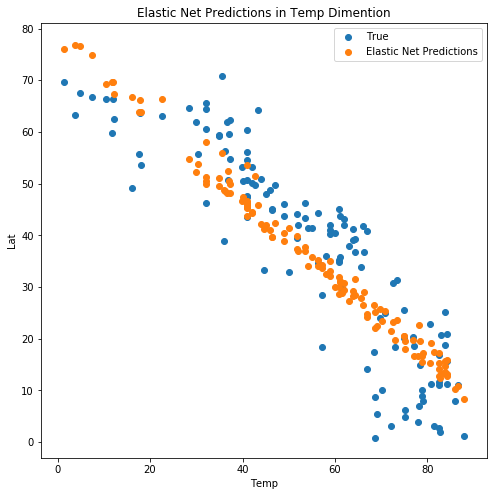

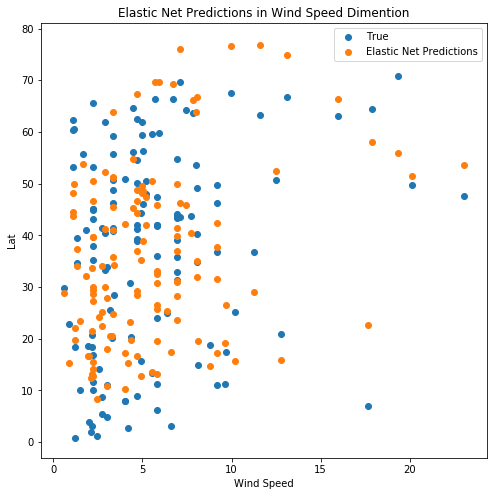

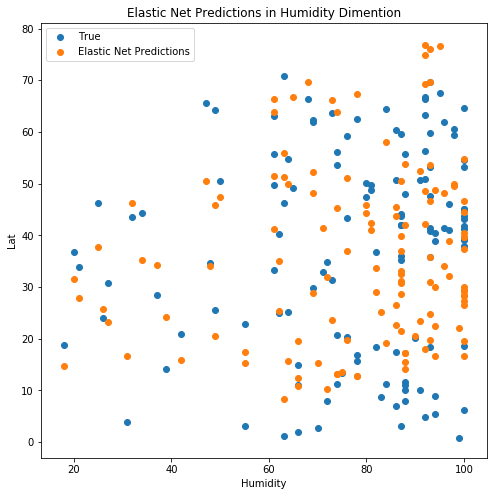

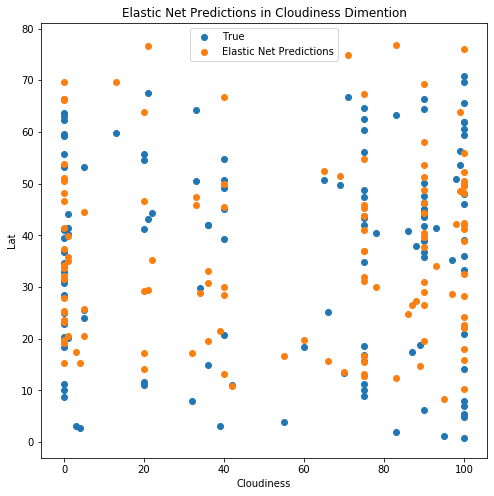

In [29]:
from scipy.stats import f_oneway

true = y_test['Lat']
names = y_test['City']


zipped = list(zip(names,true, predictions))

df = pd.DataFrame(zipped, columns=['City','True Lat', 'Predicted Lat'])
#df['Residual Squared Error'] = (df['Predicted Lat']-df['True Lat'])**2
#df['Total Sum of Squares'] = (df['True Lat']-df['True Lat'].mean())**2
y_hat_test = df['Predicted Lat']

y_hat_train = model.predict(x_train)

ss_test = [(yhat - y)**2 for (yhat,y) in zip(y_hat_test,y_test['Lat'])]
ss_train= [(yhat - y)**2 for (yhat,y) in zip(y_hat_train,y_train['Lat'])]
mse = (1/len(y_hat_test))*(sum(ss_test))
mse_train = (1/len(y_hat_train))*(sum(ss_train))
display(df.head())



print('Train Data Mean Squared Error', mse_train)
print('Test Data Mean Squared Error ',mse)
print('Model R2 ',model.score(x_train,y_train['Lat']))
print(f_oneway(y_test['Lat'],predictions))

plt.figure(figsize=(8,8))
plt.scatter(x_test['Max Temp'],y_test['Lat'],label='True')
plt.scatter(x_test['Max Temp'],predictions,label='Elastic Net Predictions')
plt.title('Elastic Net Predictions in Temp Dimention')
plt.xlabel('Temp')
plt.ylabel('Lat')
plt.legend()
plt.show()


plt.figure(figsize=(8,8))
plt.scatter(x_test['Wind Speed'],y_test['Lat'],label='True')
plt.scatter(x_test['Wind Speed'],predictions,label='Elastic Net Predictions')
plt.title('Elastic Net Predictions in Wind Speed Dimention')
plt.xlabel('Wind Speed')
plt.ylabel('Lat')
plt.legend()
plt.show()


plt.figure(figsize=(8,8))
plt.scatter(x_test['Humidity'],y_test['Lat'],label='True')
plt.scatter(x_test['Humidity'],predictions,label='Elastic Net Predictions')
plt.title('Elastic Net Predictions in Humidity Dimention')
plt.xlabel('Humidity')
plt.ylabel('Lat')
plt.legend()
plt.show()


plt.figure(figsize=(8,8))
plt.scatter(x_test['Cloudiness'],y_test['Lat'],label='True')
plt.scatter(x_test['Cloudiness'],predictions,label='Elastic Net Predictions')
plt.title('Elastic Net Predictions in Cloudiness Dimention')
plt.xlabel('Cloudiness')
plt.ylabel('Lat')
plt.legend()
plt.show()

# Building semi self-built model using polynomial regression in each dimention separately, then using a weighted average, heavily favored towards the prediction given from the temp dimention, to give a latitude prediction


Train Data Mean Squared Error 84.43605054945466
Test Data Mean Squared Error  70.19875768608938
Model R2  0.7842199396130518
F_onewayResult(statistic=0.7456192179645877, pvalue=0.388681399553058)


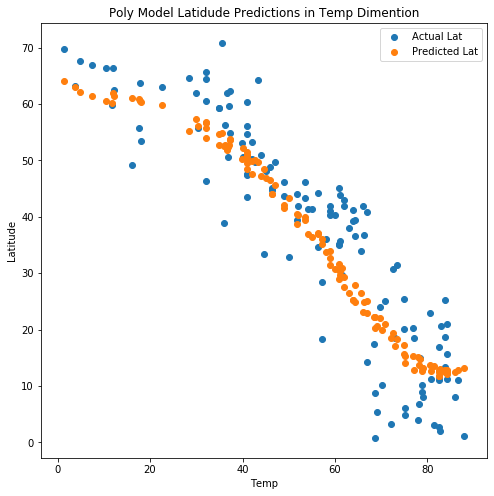

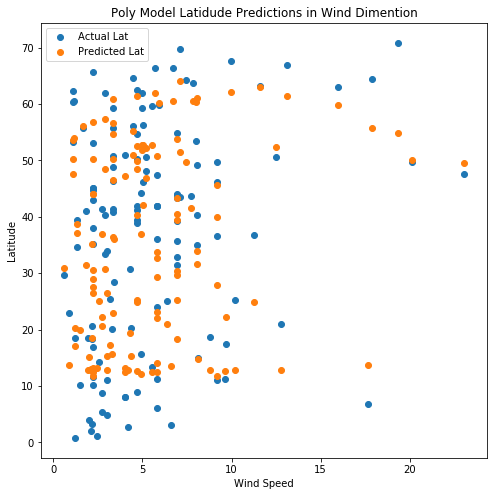

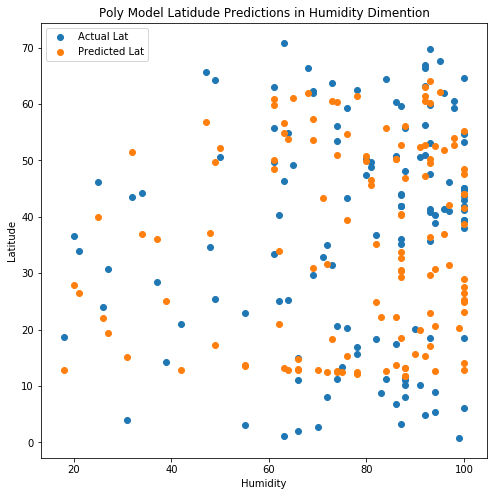

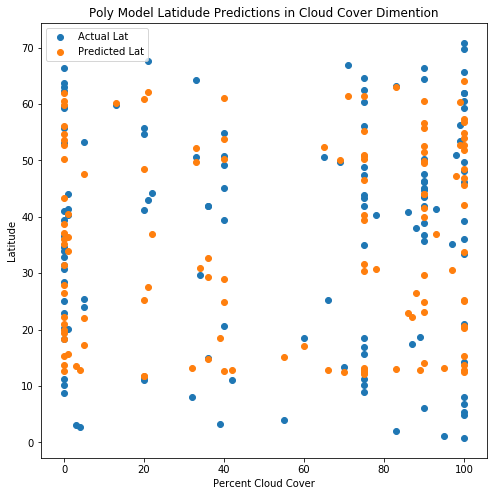

In [41]:
#x = sum_df.loc[sum_df['Lat']<=60,'Lat'].values

def poly4(x,a,b,c,d,h,k):
    return (a*((x-h)**4))+(b*((x-h)**3))+(c*((x-h)**2))+(d*((x-h)))+ k

param4_temp, param_cov4 = curve_fit(poly4,x_train['Max Temp'],y_train['Lat'],maxfev=10000)
param4_wind, param_cov4 = curve_fit(poly4,x_train['Wind Speed'],y_train['Lat'],maxfev=10000)
param4_cloud, param_cov4 = curve_fit(poly4,x_train['Cloudiness'],y_train['Lat'],maxfev=10000)
param4_hum, param_cov4 = curve_fit(poly4,x_train['Humidity'],y_train['Lat'],maxfev=10000)





def predict_lat4(x_test,x_train):
    x_test, x_train = pd.DataFrame(x_test), pd.DataFrame(x_train)
    for index, row in x_test.iterrows():
        temp,wind,hum,cloud = row[0],row[1], row[2],row[3]
        p4_temp = poly4(temp,*param4_temp)
        p4_wind = poly4(wind, *param4_wind)
        p4_cloud = poly4(cloud,*param4_cloud)
        p4_hum = poly4(cloud, *param4_cloud)
        weights = [5,.005,.0001,.000001]
        weighted_avg = ((p4_temp*weights[0])+(p4_wind*weights[1])+(p4_cloud*weights[2])+(p4_hum*weights[3]))/(sum(weights))
        x_test.loc[index, 'Predicted Lat'] = weighted_avg
    for index, row in x_train.iterrows():
        temp,wind,hum,cloud = row[0],row[1], row[2],row[3]
        p4_temp = poly4(temp,*param4_temp)
        p4_wind = poly4(wind, *param4_wind)
        p4_cloud = poly4(cloud,*param4_cloud)
        p4_hum = poly4(cloud, *param4_cloud)
        weights = [5,.005,.0001,.000001]
        weighted_avg = ((p4_temp*weights[0])+(p4_wind*weights[1])+(p4_cloud*weights[2])+(p4_hum*weights[3]))/(sum(weights))
        x_train.loc[index, 'Predicted Lat'] = weighted_avg
        
        
predict_lat4(x_test,x_train)
    
    
df_test = x_test.join(y_test)
#display(df_test)

df_train = x_train.join(y_train)
df_train['Residual Squared Error'] = (df_train['Predicted Lat']-df_train['Lat'])**2
df_train['Total Sum of Squares'] = (df_train['Lat']-df_train['Lat'].mean())**2
r2 = 1-(df_train['Residual Squared Error'].sum()/df_train['Total Sum of Squares'].sum())
#display(df_train)
    
y_hat_test = df_test['Predicted Lat'].values

y_hat_train = df_train['Predicted Lat'].values

ss_test = [(yhat - y)**2 for (yhat,y) in zip(y_hat_test,df_test['Lat'])]
ss_train= [(yhat - y)**2 for (yhat,y) in zip(y_hat_train,df_train['Lat'])]
mse = (1/len(y_hat_test))*(sum(ss_test))
mse_train = (1/len(y_hat_train))*(sum(ss_train))
#display(df.head())



print('Train Data Mean Squared Error', mse_train)
print('Test Data Mean Squared Error ',mse)
print('Model R2 ',r2)
print(f_oneway(df_test['Lat'],df_test['Predicted Lat']))


plt.figure(figsize=(8,8))
plt.scatter(df_test['Max Temp'],df_test['Lat'],label='Actual Lat')
plt.scatter(df_test['Max Temp'],df_test['Predicted Lat'],label='Predicted Lat')
plt.title('Poly Model Latidude Predictions in Temp Dimention')
plt.xlabel('Temp')
plt.ylabel('Latitude')
plt.legend()
plt.show()


plt.figure(figsize=(8,8))
plt.scatter(df_test['Wind Speed'],df_test['Lat'],label='Actual Lat')
plt.scatter(df_test['Wind Speed'],df_test['Predicted Lat'],label='Predicted Lat')
plt.title('Poly Model Latidude Predictions in Wind Dimention')
plt.xlabel('Wind Speed')
plt.ylabel('Latitude')
plt.legend()
plt.show()


plt.figure(figsize=(8,8))
plt.scatter(df_test['Humidity'],df_test['Lat'],label='Actual Lat')
plt.scatter(df_test['Humidity'],df_test['Predicted Lat'],label='Predicted Lat')
plt.title('Poly Model Latidude Predictions in Humidity Dimention')
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.legend()
plt.show()


plt.figure(figsize=(8,8))
plt.scatter(df_test['Cloudiness'],df_test['Lat'],label='Actual Lat')
plt.scatter(df_test['Cloudiness'],df_test['Predicted Lat'],label='Predicted Lat')
plt.title('Poly Model Latidude Predictions in Cloud Cover Dimention')
plt.xlabel('Percent Cloud Cover')
plt.ylabel('Latitude')
plt.legend()
plt.show()
